# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [23]:
import joblib
# Load the pickle file using joblib
data_dtm = joblib.load("data_dtm.pkl")

In [24]:
data = data_dtm.transpose()
data.head()

,ahir,alex,ali,anthony,bill,bo,dave,george,hasan,jacqueline,...,jim,joe,john,keith,louis,mark,michelle,mike,patton,ricky
absolutely,4,2,0,0,3,0,0,2,0,1,...,0,0,1,0,0,0,1,0,1,0
act,0,0,1,1,4,0,4,2,0,9,...,4,1,1,0,0,0,1,0,1,0
actual,1,0,0,0,0,0,1,1,0,1,...,1,0,0,0,3,1,1,1,0,2
admit,1,0,0,2,0,0,1,5,0,1,...,0,2,0,1,0,1,0,0,0,0
afford,1,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,1


In [25]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ahir': [('country', 26),
  ('sort', 20),
  ('listen', 15),
  ('basically', 14),
  ('obviously', 12),
  ('married', 11),
  ('boy', 11),
  ('loved', 10),
  ('quite', 10),
  ('asian', 9),
  ('needed', 9),
  ('eventually', 8),
  ('entire', 8),
  ('living', 7),
  ('parents', 7),
  ('died', 7),
  ('possible', 7),
  ('young', 7),
  ('earth', 6),
  ('normal', 6),
  ('known', 6),
  ('sat', 6),
  ('hours', 6),
  ('west', 6),
  ('know mean', 6),
  ('agree', 6),
  ('single', 6),
  ('society', 6),
  ('hed', 6),
  ('wife', 6)],
 'alex': [('jewish', 46),
  ('christmas', 34),
  ('meeting', 20),
  ('hes like', 19),
  ('father', 18),
  ('mom', 17),
  ('means', 14),
  ('list', 14),
  ('upset', 11),
  ('parents', 10),
  ('works', 9),
  ('circle', 9),
  ('obviously', 9),
  ('worry', 8),
  ('amazing', 8),
  ('social media', 8),
  ('standing', 8),
  ('favorite', 8),
  ('single', 8),
  ('media', 8),
  ('joke', 8),
  ('questions', 8),
  ('names', 7),
  ('starts', 7),
  ('living', 7),
  ('privilege', 7),
  ('

In [26]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ahir
country, sort, listen, basically, obviously, married, boy, loved, quite, asian, needed, eventually, entire, living
---
alex
jewish, christmas, meeting, hes like, father, mom, means, list, upset, parents, works, circle, obviously, worry
---
ali
husband, dude, asian, scared, fingers, mom, dont wanna, anymore, eat, body, married, paper, pussy, months
---
anthony
joke, mad, hate, mom, loved, card, college, death, favorite, ive got, shows, horrible, entire, phone
---
bill
dude, sleep, jesus, sudden, religion, sense, trouble, hit, fuckin, bring, right just, dont understand, wife, anybody
---
bo
exist, looks like, quickly, plus, police, pop, pops, porn, position, possible, power, president, pretend, pretty good
---
dave
gay, son, mad, young, motherfucker, wife, american, water, black people, age, havent, dude, fucked, good night
---
george
american, asshole, rich, dead, cancer, using, human, assholes, dying, news, homeless, society, class, glad
---
hasan
door, dog, mom, parents, hes like

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [27]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['country',
 'sort',
 'listen',
 'basically',
 'obviously',
 'married',
 'boy',
 'loved',
 'quite',
 'asian',
 'needed',
 'eventually',
 'entire',
 'living',
 'parents',
 'died',
 'possible',
 'young',
 'earth',
 'normal',
 'known',
 'sat',
 'hours',
 'west',
 'know mean',
 'agree',
 'single',
 'society',
 'hed',
 'wife',
 'jewish',
 'christmas',
 'meeting',
 'hes like',
 'father',
 'mom',
 'means',
 'list',
 'upset',
 'parents',
 'works',
 'circle',
 'obviously',
 'worry',
 'amazing',
 'social media',
 'standing',
 'favorite',
 'single',
 'media',
 'joke',
 'questions',
 'names',
 'starts',
 'living',
 'privilege',
 'conversation',
 'dumb',
 'york',
 'new york',
 'husband',
 'dude',
 'asian',
 'scared',
 'fingers',
 'mom',
 'dont wanna',
 'anymore',
 'eat',
 'body',
 'married',
 'paper',
 'pussy',
 'months',
 'means',
 'huge',
 'know like',
 'seven',
 'ladies',
 'doctor',
 'office',
 'homeless',
 'playing',
 'grew',
 'push',
 'business',
 'blow',
 'theyll',
 'hole',
 'inside',
 'joke'

In [28]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('parents', 7),
 ('mom', 7),
 ('son', 7),
 ('joke', 6),
 ('wife', 5),
 ('dude', 5),
 ('dead', 5),
 ('hit', 5),
 ('bring', 5),
 ('dick', 5),
 ('president', 5),
 ('door', 5),
 ('dog', 5),
 ('listen', 4),
 ('married', 4),
 ('asian', 4),
 ('entire', 4),
 ('young', 4),
 ('earth', 4),
 ('hes like', 4),
 ('means', 4),
 ('eat', 4),
 ('know like', 4),
 ('homeless', 4),
 ('cool', 4),
 ('anybody', 4),
 ('news', 4),
 ('sort', 3),
 ('obviously', 3),
 ('boy', 3),
 ('loved', 3),
 ('living', 3),
 ('possible', 3),
 ('know mean', 3),
 ('single', 3),
 ('society', 3),
 ('hed', 3),
 ('list', 3),
 ('worry', 3),
 ('york', 3),
 ('ladies', 3),
 ('doctor', 3),
 ('office', 3),
 ('playing', 3),
 ('mad', 3),
 ('hate', 3),
 ('college', 3),
 ('phone', 3),
 ('shut', 3),
 ('religion', 3),
 ('sense', 3),
 ('em', 3),
 ('play', 3),
 ('gay', 3),
 ('motherfucker', 3),
 ('american', 3),
 ('water', 3),
 ('fucked', 3),
 ('dinner', 3),
 ('class', 3),
 ('buy', 3),
 ('bitch', 3),
 ('gave', 3),
 ('ah', 3),
 ('idea', 3),
 ('damn'

In [29]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words

['parents',
 'mom',
 'son',
 'joke',
 'wife',
 'dude',
 'dead',
 'hit',
 'bring',
 'dick',
 'president',
 'door',
 'dog',
 'listen',
 'married',
 'asian',
 'entire',
 'young',
 'earth',
 'hes like',
 'means',
 'eat',
 'know like',
 'homeless',
 'cool',
 'anybody',
 'news']

In [30]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# Read in cleaned data
data_clean = joblib.load("mydata_clean.pkl")

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words)) 

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

C:\Users\CGDXK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['hes', 'know', 'like'] not in stop_words.
  warnings.warn(


In [31]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


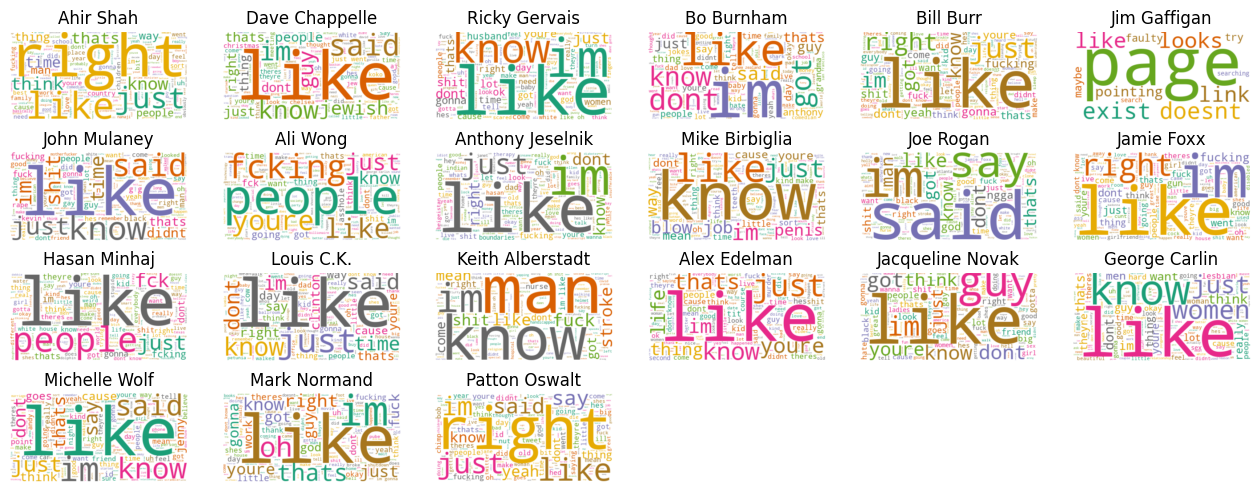

In [32]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#               'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']
full_names = ['Ahir Shah', 'Dave Chappelle', 'Ricky Gervais', 'Bo Burnham', 'Bill Burr', 'Jim Gaffigan', 
              'John Mulaney', 'Ali Wong', 'Anthony Jeselnik', 'Mike Birbiglia', 'Joe Rogan', 'Jamie Foxx', 
              'Hasan Minhaj', 'Louis C.K.', 'Keith Alberstadt', 'Alex Edelman', 'Jacqueline Novak', 
              'George Carlin', 'Michelle Wolf', 'Mark Normand', 'Patton Oswalt']
# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 6, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [33]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
5,Jim Gaffigan,2
14,Keith Alberstadt,230
10,Joe Rogan,272
3,Bo Burnham,354
16,Jacqueline Novak,357
8,Anthony Jeselnik,357
2,Ricky Gervais,391
15,Alex Edelman,393
19,Mark Normand,398
17,George Carlin,425


In [34]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes

run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79, 60, 60, 76, 60, 60, 76, 60, 60,60]


# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']
data_words['Unique_words_per_minute'] = data_words['unique_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute,Unique_words_per_minute
5,Jim Gaffigan,2,2,73,0.027397,0.027397
14,Keith Alberstadt,230,402,76,5.289474,3.026316
10,Joe Rogan,272,668,76,8.789474,3.578947
2,Ricky Gervais,391,746,80,9.325000,4.887500
8,Anthony Jeselnik,357,683,62,11.016129,5.758065
16,Jacqueline Novak,357,689,60,11.483333,5.950000
3,Bo Burnham,354,718,60,11.966667,5.900000
6,John Mulaney,453,928,77,12.051948,5.883117
19,Mark Normand,398,738,60,12.300000,6.633333
17,George Carlin,425,960,76,12.631579,5.592105


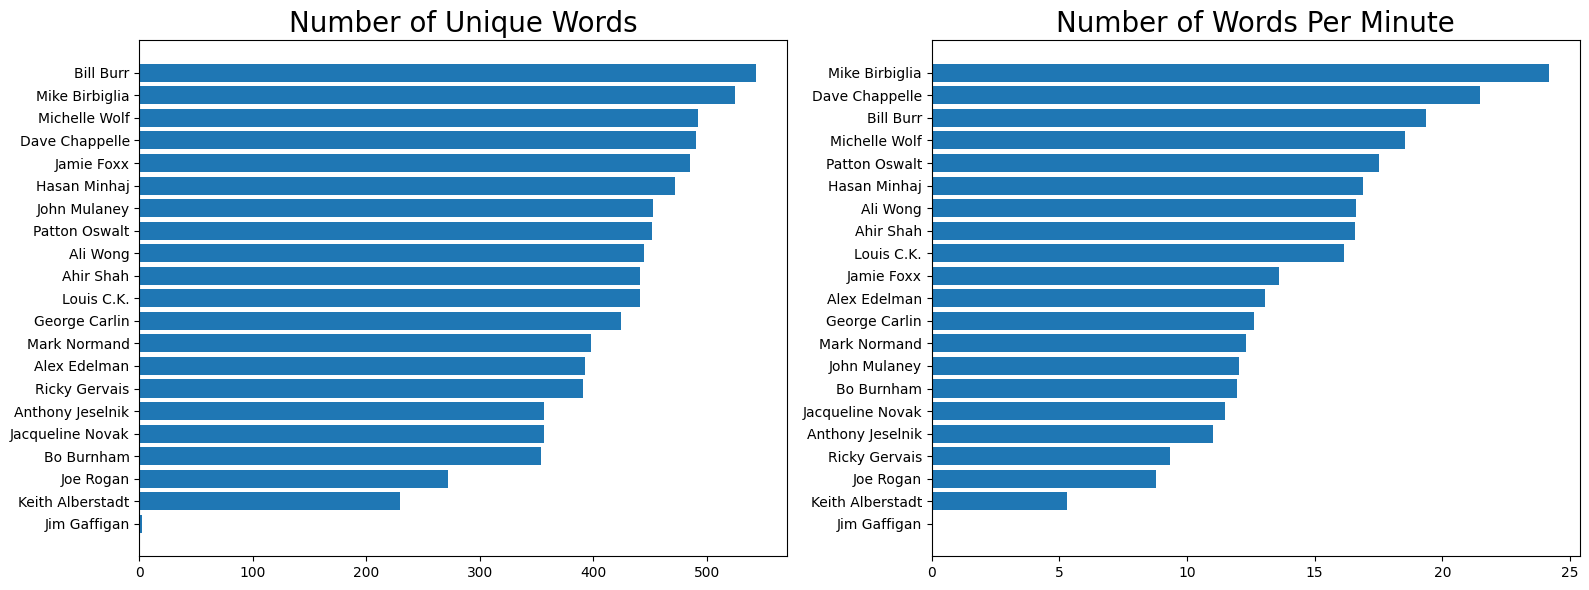

In [35]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [36]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('parents', 7),
 ('mom', 7),
 ('son', 7),
 ('joke', 6),
 ('wife', 5),
 ('dude', 5),
 ('dead', 5),
 ('hit', 5),
 ('bring', 5),
 ('dick', 5),
 ('president', 5),
 ('door', 5),
 ('dog', 5),
 ('listen', 4),
 ('married', 4),
 ('asian', 4),
 ('entire', 4),
 ('young', 4),
 ('earth', 4),
 ('hes like', 4),
 ('means', 4),
 ('eat', 4),
 ('know like', 4),
 ('homeless', 4),
 ('cool', 4),
 ('anybody', 4),
 ('news', 4),
 ('sort', 3),
 ('obviously', 3),
 ('boy', 3),
 ('loved', 3),
 ('living', 3),
 ('possible', 3),
 ('know mean', 3),
 ('single', 3),
 ('society', 3),
 ('hed', 3),
 ('list', 3),
 ('worry', 3),
 ('york', 3),
 ('ladies', 3),
 ('doctor', 3),
 ('office', 3),
 ('playing', 3),
 ('mad', 3),
 ('hate', 3),
 ('college', 3),
 ('phone', 3),
 ('shut', 3),
 ('religion', 3),
 ('sense', 3),
 ('em', 3),
 ('play', 3),
 ('gay', 3),
 ('motherfucker', 3),
 ('american', 3),
 ('water', 3),
 ('fucked', 3),
 ('dinner', 3),
 ('class', 3),
 ('buy', 3),
 ('bitch', 3),
 ('gave', 3),
 ('ah', 3),
 ('idea', 3),
 ('damn'

In [37]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['rape', 'assholes','bullshit', 'cool','respect','loved']]
data_profanity = pd.concat([data_bad_words.rape + data_bad_words.assholes + data_bad_words.bullshit, data_bad_words.cool+data_bad_words.respect+data_bad_words.loved], axis=1)
data_profanity.columns = ['abuse_word', 'healthy_word']
data_profanity

,abuse_word,healthy_word
ahir,1,13
alex,4,9
ali,0,6
anthony,1,13
bill,3,5
bo,0,0
dave,6,1
george,14,0
hasan,0,1
jacqueline,1,8


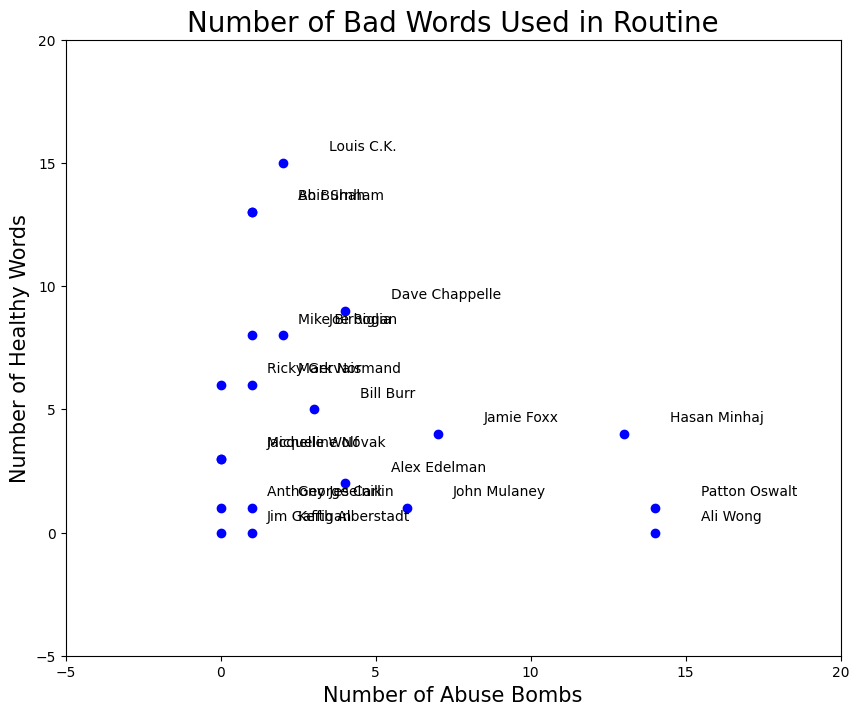

In [38]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.abuse_word.loc[comedian]
    y = data_profanity.healthy_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 20)
    plt.ylim(-5,20) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of Abuse Bombs', fontsize=15)
plt.ylabel('Number of Healthy Words', fontsize=15)

plt.show()

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.


***MY OBSERVATION***

1. **Varied Use of “Bad” vs. “Healthy” Words:**  
   - The horizontal (x) axis shows how frequently each comedian uses “abuse bombs” (i.e., profanities or strong negative words).  
   - The vertical (y) axis shows how frequently they use “healthy” or more positive words.  

2. **No Clear One-to-One Correlation:**  
   - Some comedians (e.g., Louis C.K.) rank high in both “abuse bombs” and “healthy words,” suggesting they simply use a **lot of words overall**, mixing both negative and positive.  
   - Others (like Jim Gaffigan) have relatively lower counts on both axes, indicating less profanity and fewer strong “healthy” words.  
   - Many cluster around the middle, with moderate use of both.  

3. **Higher Word Count, More of Everything:**  
   - A loose trend is that comedians who speak more (longer sets, higher word count) tend to use **both** more negative and more positive words.  
   - Those who are more concise or have a subtler style may score lower on both axes.  

4. **Stylistic Differences:**  
   - The chart highlights that comedic routines vary widely in tone and language. There isn’t a single “type” of comedic language; some balance strong profanity with equally strong positive language, while others use little of either.  

Overall, the main takeaway is that the **frequency of “abuse bombs” doesn’t necessarily replace or preclude “healthy words.”** Instead, comedians who use a lot of language tend to use **both** kinds more often, while those who speak less (or lean on different comedic styles) tend to use fewer strong words overall.